In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Evitar mensajes de advertencia innecesarios



1. Carga de datos
Objetivo: Importar las hojas relevantes desde el archivo .xlsx.
Cumplimiento: Selecciona y carga las hojas necesarias (como Penetración-hogares, Accesos_tecnologia_localidad, etc.) para un análisis focalizado.

In [2]:
# 1. Carga de datos
ruta_archivo = "D:\Soy Henry\Labs\Data Analystic\Dataset\Internet.xlsx" 



In [3]:
# Selección de hojas relevantes
df_penetracion_hogares = pd.read_excel(ruta_archivo, sheet_name="Penetracion-hogares")
df_accesos_tecnologia = pd.read_excel(ruta_archivo, sheet_name="Accesos_tecnologia_localidad")
df_totales_velocidad = pd.read_excel(ruta_archivo, sheet_name="Totales Accesos Por Tecnología")
df_ingresos = pd.read_excel(ruta_archivo, sheet_name="Ingresos ")
df_velocidad_prov = pd.read_excel(ruta_archivo, sheet_name="Velocidad % por prov")



In [4]:
# Revisión inicial de cada hoja
print("Penetracion-hogares:")
print(df_penetracion_hogares.info())
print(df_penetracion_hogares.head())

print("\nAccesos_tecnologia_localidad:")
print(df_accesos_tecnologia.info())
print(df_accesos_tecnologia.head())

print("\nTotales Accesos Por Tecnología:")
print(df_totales_velocidad.info())
print(df_totales_velocidad.head())

print("\nIngresos :")
print(df_ingresos.info())
print(df_ingresos.head())

print("\nVelocidad % por prov:")
print(df_velocidad_prov.info())
print(df_velocidad_prov.head())



Penetracion-hogares:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33

Accesos_tecnologia_localidad:
<class 'pandas.core.frame

2. Exploración inicial
Objetivo:
Identificar valores faltantes, duplicados, y revisar la estructura de los datos.
Asegurarse de que los datos son utilizables y comprensibles.
Cumplimiento: Incluye inspección de columnas, tipos de datos, valores faltantes, duplicados, y visualizaciones básicas para detectar posibles problemas.

In [5]:
# 2. Exploración de cada hoja
# Valores faltantes y duplicados
def revisar_datos(df, nombre):
    print(f"\nRevisión de {nombre}:")
    print(f"Valores faltantes:\n{df.isnull().sum()}")
    print(f"Duplicados: {df.duplicated().sum()}\n")

revisar_datos(df_penetracion_hogares, "Penetración en hogares")
revisar_datos(df_accesos_tecnologia, "Accesos por tecnología")
revisar_datos(df_totales_velocidad, "Totales de accesos por velocidad")
revisar_datos(df_ingresos, "Ingresos")
revisar_datos(df_velocidad_prov, "Velocidad por provincia")




Revisión de Penetración en hogares:
Valores faltantes:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Duplicados: 0


Revisión de Accesos por tecnología:
Valores faltantes:
Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64
Duplicados: 0


Revisión de Totales de accesos por velocidad:
Valores faltantes:
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Duplicados: 0


Revisión de Ingresos:
Valores faltantes:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Duplicados: 0


Revisión de Velocidad por provincia:
Valores faltantes:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Med

3. Limpieza de datos
Objetivo: Tratar problemas como duplicados y valores faltantes, asegurando que los datos sean consistentes y completos.
Cumplimiento: Realiza ejemplos de eliminación de duplicados e imputación de valores faltantes (puedes expandir según necesidades específicas).

In [6]:
# Limpieza de datos (ejemplo general)
df_penetracion_hogares.drop_duplicates(inplace=True)
df_accesos_tecnologia.drop_duplicates(inplace=True)


4. Visualización de datos
Objetivo: Generar gráficos adecuados según la tipología de cada variable (cuantitativa o cualitativa).
Cumplimiento: Incluye:
Gráficos de barras para analizar tendencias como la penetración de internet por provincia.
Gráficos de conteo para distribuciones por tipo de tecnología.
Gráficos de dispersión para estudiar relaciones como Penetración vs. Ingresos.

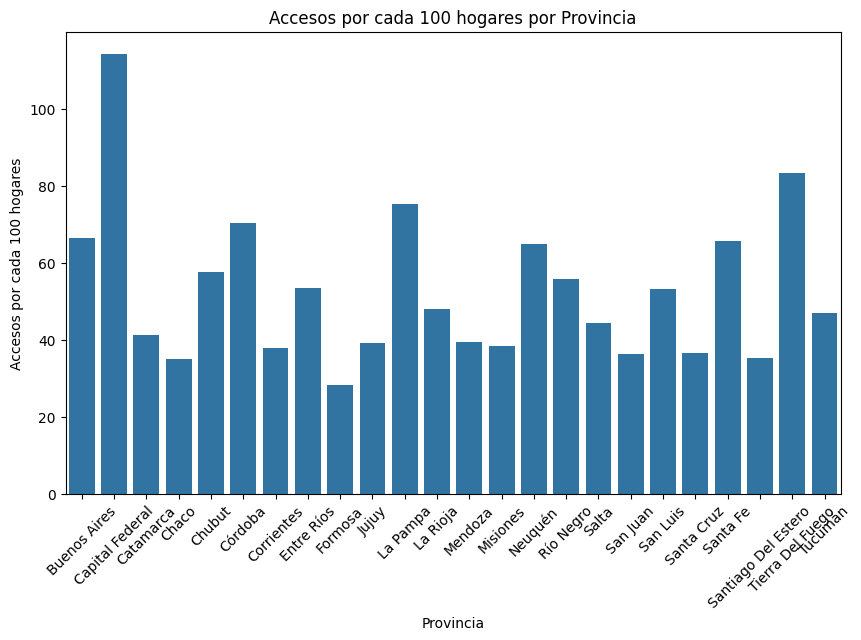

In [7]:

# Visualizaciones de ejemplo
# Penetración de internet en hogares por provincia
plt.figure(figsize=(10, 6))
sns.barplot(data=df_penetracion_hogares, x="Provincia", y="Accesos por cada 100 hogares", ci=None)
plt.title("Accesos por cada 100 hogares por Provincia")
plt.xticks(rotation=45)
plt.show()



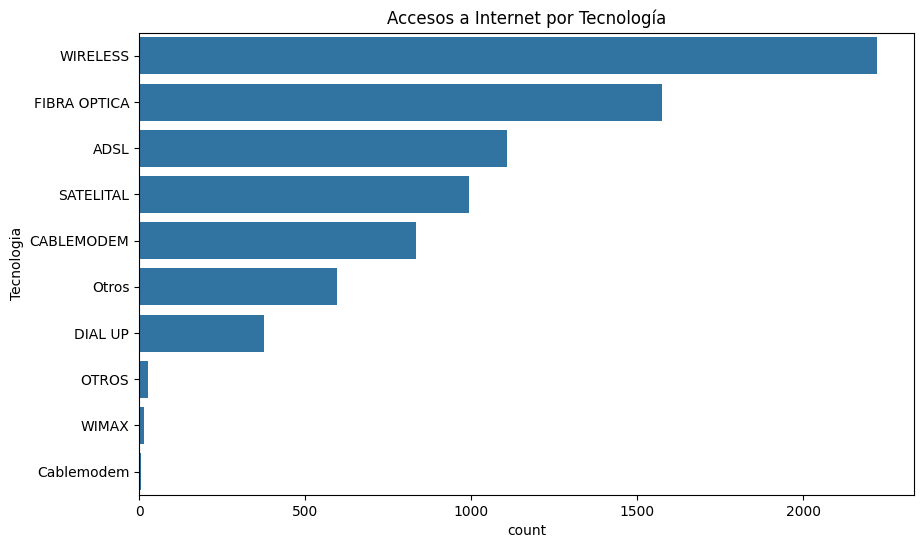

In [10]:
# Accesos por tecnología
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accesos_tecnologia, y="Tecnologia", order=df_accesos_tecnologia["Tecnologia"].value_counts().index)
plt.title("Accesos a Internet por Tecnología")
plt.show()



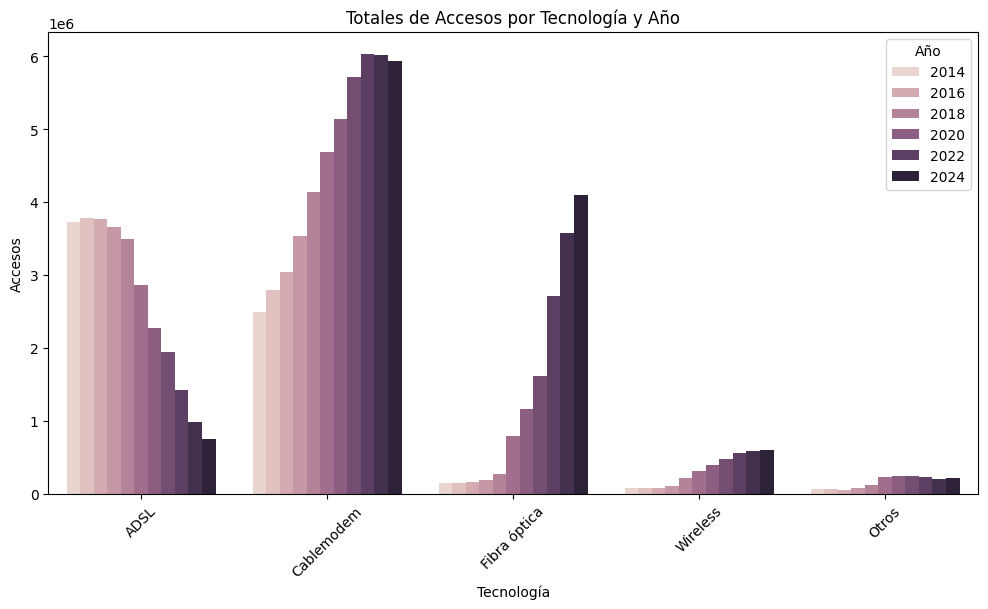

In [8]:
# Totales de accesos por velocidad
tecnologias = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"]
df_grafico = df_totales_velocidad[["Año", "Trimestre"] + tecnologias].melt(
    id_vars=["Año", "Trimestre"], 
    value_vars=tecnologias, 
    var_name="Tecnología", 
    value_name="Accesos"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grafico, x="Tecnología", y="Accesos", hue="Año", ci=None)
plt.title("Totales de Accesos por Tecnología y Año")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.show()



5. Combinación de datasets
Objetivo: Unir múltiples hojas para crear un dataset consolidado y facilitar análisis más profundos.
Cumplimiento: Combina hojas basadas en claves comunes (Provincia) y revisa el dataset resultante.

In [9]:
# Combinación de datasets


# Ejemplo de unión usando "Provincia" como clave
merged_df = pd.merge(df_penetracion_hogares, df_velocidad_prov, on="Provincia", how="inner")
# Renombrar las columnas para eliminar el sufijo
merged_df.rename(columns={"Año_x": "Año", "Trimestre_x": "Trimestre"}, inplace=True)
merged_df.drop(columns=["Año_y", "Trimestre_y"], inplace=True)
merged_df = pd.merge(df_penetracion_hogares, df_ingresos, on=["Año", "Trimestre"], how="inner")



In [10]:
# Revisión del dataset combinado
print("\nDataset combinado:")
print(merged_df.info())
print(merged_df.head())




Dataset combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           976 non-null    int64  
 1   Trimestre                     976 non-null    int64  
 2   Provincia                     976 non-null    object 
 3   Accesos por cada 100 hogares  976 non-null    float64
 4   Ingresos (miles de pesos)     976 non-null    float64
 5   Periodo                       976 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.9+ KB
None
    Año  Trimestre        Provincia  Accesos por cada 100 hogares  \
0  2024          2     Buenos Aires                         79.84   
1  2024          2  Capital Federal                        116.37   
2  2024          2        Catamarca                         68.81   
3  2024          2            Chaco                         

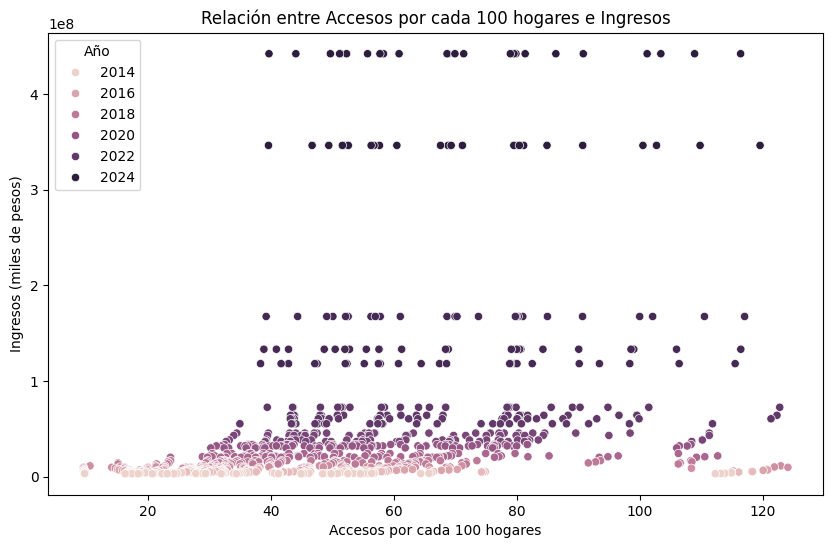

In [11]:
# Visualización de ejemplo con el dataset combinado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="Accesos por cada 100 hogares", y="Ingresos (miles de pesos)", hue="Año")
plt.title("Relación entre Accesos por cada 100 hogares e Ingresos")
plt.xlabel("Accesos por cada 100 hogares")
plt.ylabel("Ingresos (miles de pesos)")
plt.show()



Carga de los datasets Externos a Internet 

In [12]:
# Cargar telefonía móvil
df_sms = pd.read_excel("Dataset\Telefonia_movil.xlsx", sheet_name="SMS")
df_llamadas = pd.read_excel("Dataset\Telefonia_movil.xlsx", sheet_name="Llamadas salientes")
df_ingreso_movil = pd.read_excel("Dataset\Telefonia_movil.xlsx", sheet_name="Ingresos")
df_penetracion_movil = pd.read_excel("Dataset\Telefonia_movil.xlsx", sheet_name="Penetracion")

# Cargar telefonía fija
df_fija_prov_tipo = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_prov_tipo")
df_fija_accesos_tot = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_accesos_tot")
df_fija_penetracion_prov = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_penetracion_prov")
df_fija_penetracion_tot = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_penetracion_tot")
df_fija_ingresos = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_ingresos")

# Cargar televisión
df_accesos_prov_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Accesos_prov_TV")
df_accesos_totales_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Accesos_totales_TV")
df_ingresos_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Ingresos_TV")
df_penetracion_prov_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Penetracion_prov_TV")
df_penetracion_totales_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Penetracion_totales_TV")


In [13]:
print(df_ingresos.columns)


Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')


Exploración inicial

In [14]:
# Ejemplo para revisar columnas y datos
print(df_sms.info())
print(df_sms.head())

print(df_llamadas.info())
print(df_llamadas.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      46 non-null     int64 
 1   Trimestre                46 non-null     int64 
 2   Número de SMS salientes  46 non-null     int64 
 3   Periodo                  46 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
None
    Año  Trimestre  Número de SMS salientes        Periodo
0  2013          1              36430004057   Ene-Mar 2013
1  2013          2              34255065773   Abr-Jun 2013
2  2013          3              33217669903  Jul-Sept 2013
3  2013          4              22547130953   Oct-Dic 2013
4  2014          1              18393198881   Ene-Mar 2013
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---

Limpieza y normalización
Unificar nombres de columnas: Verifica si hay diferencias en nombres como Año y Trimestre y normalízalos.

In [15]:
df_sms.drop_duplicates(inplace=True)
df_llamadas.drop_duplicates(inplace=True)


Combinación de datasets
Uniremos los datasets relevantes utilizando columnas comunes como Año, Trimestre y Provincia.

In [16]:
# Unir Telefonía Móvil con Penetración por Provincia
merged_movil = pd.merge(df_penetracion_movil, df_ingreso_movil, on=["Año", "Trimestre"], how="inner")

# Unir Telefonía Fija
merged_fija = pd.merge(df_fija_prov_tipo, df_fija_ingresos, on=["Año", "Trimestre"], how="inner")

# Unir Televisión
merged_tv = pd.merge(df_accesos_prov_tv, df_ingresos_tv, on=["Año", "Trimestre"], how="inner")


Consolidación general
Finalmente, unimos los datasets consolidados de internet, telefonía móvil, fija y televisión para un análisis integral:

In [17]:
merged_final = pd.merge(merged_df, merged_movil, on=["Año", "Trimestre"], how="outer")
merged_final = pd.merge(merged_final, merged_fija, on=["Año", "Trimestre"], how="outer")
merged_final = pd.merge(merged_final, merged_tv, on=["Año", "Trimestre"], how="outer")

# Revisión del dataset combinado
print(merged_final.info())
print(merged_final.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562756 entries, 0 to 562755
Data columns (total 21 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Año                                        562756 non-null  int64  
 1   Trimestre                                  562756 non-null  int64  
 2   Provincia_x                                562176 non-null  object 
 3   Accesos por cada 100 hogares               562176 non-null  float64
 4   Ingresos (miles de pesos)                  562176 non-null  float64
 5   Periodo                                    562176 non-null  object 
 6   Accesos por cada 100 hab                   562756 non-null  float64
 7   Periodo_x                                  562756 non-null  object 
 8   Ingresos (miles de $)_x                    562756 non-null  int64  
 9   Periodo_y                                  562756 non-null  object 
 10  Provinci

7. Análisis y Visualizaciones
a) Verificación del dataset consolidado
Antes de realizar el análisis, confirmemos que los datos están correctamente combinados y que no hay valores anómalos:

In [18]:
# Verificar valores faltantes
print(merged_final.isnull().sum())

# Resumen estadístico
print(merged_final.describe())

# Revisar duplicados
print(f"Registros duplicados: {merged_final.duplicated().sum()}")


Año                                            0
Trimestre                                      0
Provincia_x                                  580
Accesos por cada 100 hogares                 580
Ingresos (miles de pesos)                    580
Periodo                                      580
Accesos por cada 100 hab                       0
Periodo_x                                      0
Ingresos (miles de $)_x                        0
Periodo_y                                      0
Provincia_y                                    4
Accesos telefonía fija (total)                 4
Accesos telefonía fija (hogares)               4
Accesos telefonía fija (comercial)             4
Accesos telefonía fija (gobierno)              4
Accesos telefonía fija (otros)                 4
Ingresos (miles de $)_y                        4
Provincia                                      4
Accesos TV por suscripción (Vrf)               4
Ingresos TV por suscripción  (miles de $)      4
Ingresos TV satelita

b) Análisis de penetración por servicio
Penetración por cada 100 habitantes (Internet, Telefonía, TV) Compara cómo evolucionaron los accesos por cada 100 habitantes para los diferentes servicios:

In [19]:
# Cargar los datasets de penetración
df_penetracion_movil = pd.read_excel("Dataset\Telefonia_movil.xlsx", sheet_name="Penetracion")
df_penetracion_fija = pd.read_excel("Dataset\Telefonia_fija.xlsx", sheet_name="Fija_penetracion_tot")
df_penetracion_tv = pd.read_excel("Dataset\Television.xlsx", sheet_name="Penetracion_totales_TV")

# Añadir la columna 'Servicios' para categorizar
df_penetracion_movil["Servicios"] = "Telefonía Móvil"
df_penetracion_fija["Servicios"] = "Telefonía Fija"
df_penetracion_tv["Servicios"] = "Televisión"


In [20]:
# Concatenar los datasets
merged_penetracion = pd.concat([df_penetracion_movil, df_penetracion_fija, df_penetracion_tv], ignore_index=True)

# Verifica el resultado
print(merged_penetracion.head())
print(merged_penetracion.columns)


    Año  Trimestre  Accesos por cada 100 hab        Periodo        Servicios  \
0  2013          1                    154.37   Ene-Mar 2013  Telefonía Móvil   
1  2013          2                    156.00   Abr-Jun 2013  Telefonía Móvil   
2  2013          3                    158.59  Jul-Sept 2013  Telefonía Móvil   
3  2013          4                    159.37   Oct-Dic 2013  Telefonía Móvil   
4  2014          1                    148.07   Ene-Mar 2014  Telefonía Móvil   

   Accesos telefonía fija por cada 100 hab  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Accesos telefonía fija por cada 100 hogares  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                         

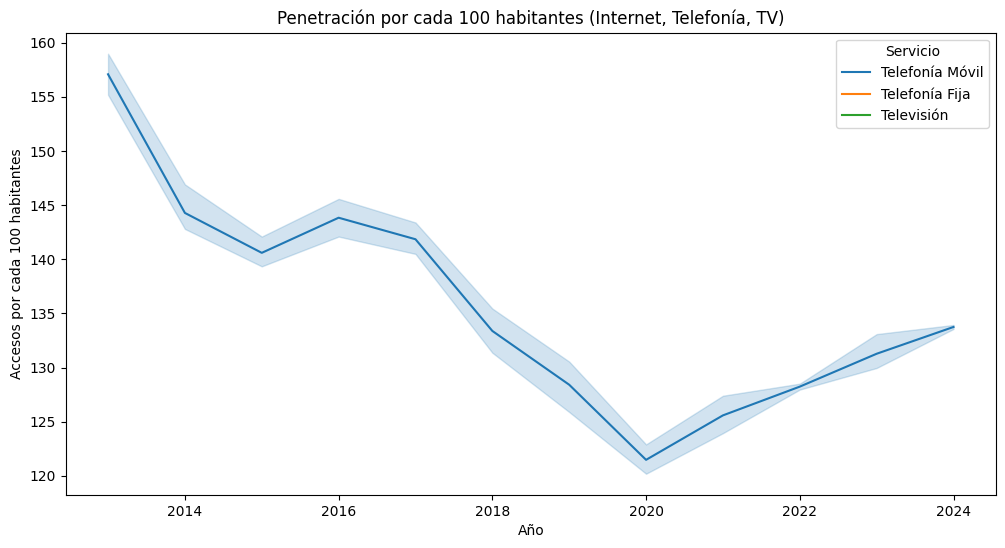

In [39]:
# Graficar con hue='Servicios'
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_penetracion, x="Año", y="Accesos por cada 100 hab", hue="Servicios")
plt.title("Penetración por cada 100 habitantes (Internet, Telefonía, TV)")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 habitantes")
plt.legend(title="Servicio")
plt.show()


Penetración en hogares por provincia (TV vs Internet)

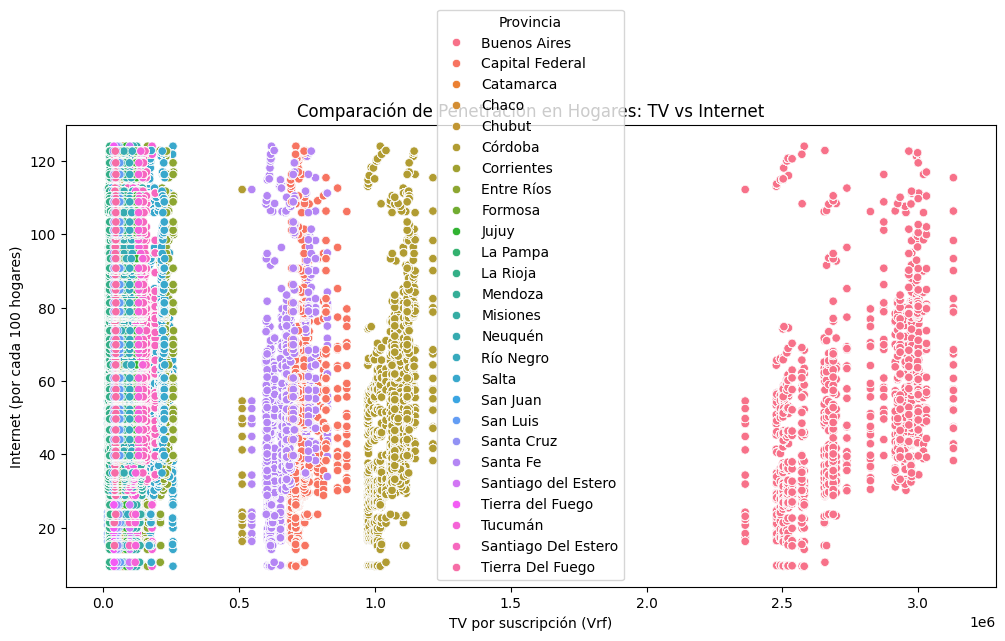

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_final,
    x="Accesos TV por suscripción (Vrf)",
    y="Accesos por cada 100 hogares",
    hue="Provincia"
)
plt.title("Comparación de Penetración en Hogares: TV vs Internet")
plt.xlabel("TV por suscripción (Vrf)")
plt.ylabel("Internet (por cada 100 hogares)")
plt.show()



Análisis de ingresos por servicio
Comparación de ingresos entre servicios (Internet, Telefonía, TV

In [21]:
print(merged_final.columns)

Index(['Año', 'Trimestre', 'Provincia_x', 'Accesos por cada 100 hogares',
       'Ingresos (miles de pesos)', 'Periodo', 'Accesos por cada 100 hab',
       'Periodo_x', 'Ingresos (miles de $)_x', 'Periodo_y', 'Provincia_y',
       'Accesos telefonía fija (total)', 'Accesos telefonía fija (hogares)',
       'Accesos telefonía fija (comercial)',
       'Accesos telefonía fija (gobierno)', 'Accesos telefonía fija (otros)',
       'Ingresos (miles de $)_y', 'Provincia',
       'Accesos TV por suscripción (Vrf)',
       'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)'],
      dtype='object')


In [22]:
ingresos_cols = [
    "Ingresos (miles de pesos)", 
    "Ingresos TV por suscripción  (miles de $)", 
    "Ingresos TV satelital (miles de $)"
]
ingresos_data = merged_final[["Año"] + ingresos_cols].groupby("Año").sum()



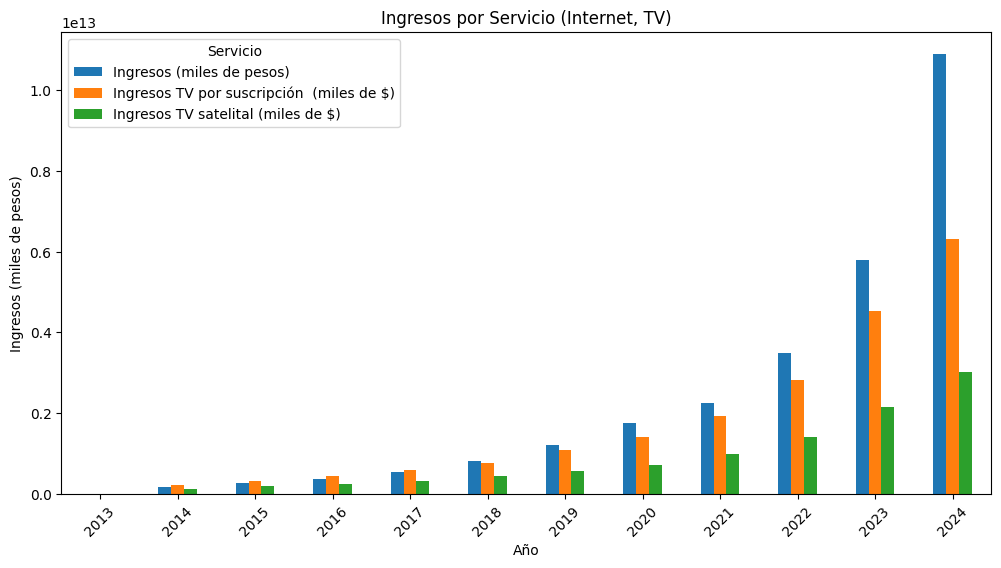

In [63]:
ingresos_data.plot(kind="bar", figsize=(12, 6))
plt.title("Ingresos por Servicio (Internet, TV)")
plt.ylabel("Ingresos (miles de pesos)")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.legend(title="Servicio")
plt.show()


KPIs sugeridos
Calcula KPIs que combinen datos entre servicios para identificar tendencias y oportunidades:

Tasa de crecimiento de ingresos anuales por servicio

In [23]:
print(merged_final.columns)

Index(['Año', 'Trimestre', 'Provincia_x', 'Accesos por cada 100 hogares',
       'Ingresos (miles de pesos)', 'Periodo', 'Accesos por cada 100 hab',
       'Periodo_x', 'Ingresos (miles de $)_x', 'Periodo_y', 'Provincia_y',
       'Accesos telefonía fija (total)', 'Accesos telefonía fija (hogares)',
       'Accesos telefonía fija (comercial)',
       'Accesos telefonía fija (gobierno)', 'Accesos telefonía fija (otros)',
       'Ingresos (miles de $)_y', 'Provincia',
       'Accesos TV por suscripción (Vrf)',
       'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)'],
      dtype='object')


In [24]:
merged_final["Crecimiento_Ingresos_Internet"] = merged_final["Ingresos (miles de pesos)"].pct_change()
merged_final["Crecimiento_Ingresos_TV"] = merged_final["Ingresos TV por suscripción  (miles de $)"].pct_change()
merged_final["Crecimiento_Ingresos_Telefonía"] = merged_final["Ingresos (miles de $)_y"].pct_change()


Agrego las columnas de Llamadas al merge final 

In [25]:
# Renombrar la columna 'Periodo' en df_llamadas antes del merge
df_llamadas = df_llamadas.rename(columns={'Periodo': 'Periodo_llamadas'})

# Ahora realizar el merge
merged_final = pd.merge(merged_final, df_llamadas, on=["Año", "Trimestre"], how="left")



Proporción de accesos móviles frente a accesos totales

In [26]:
merged_final["Proporción_Accesos_Móviles"] = merged_final["Total de llamadas salientes (miles)"] / merged_final["Accesos telefonía fija (total)"]


1. Explora la nueva columna
Revisa los valores calculados para asegurarte de que tienen sentido:

In [20]:

print(merged_final[["Total de llamadas salientes (miles)", "Accesos telefonía fija (total)", "Proporción_Accesos_Móviles"]].head())


   Total de llamadas salientes (miles)  Accesos telefonía fija (total)  \
0                            7209313.0                             NaN   
1                            7856258.0                             NaN   
2                            8281653.0                             NaN   
3                            8650667.0                             NaN   
4                            7590580.0                       4385408.0   

   Proporción_Accesos_Móviles  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                    1.730872  


2. Descripción estadística
Obtén un resumen estadístico de la proporción para entender su distribución:
Esto te dará información sobre:

El promedio (media).
Los valores mínimos y máximos.
La dispersión (desviación estándar).


In [21]:
print(merged_final["Proporción_Accesos_Móviles"].describe())


count    562752.000000
mean         96.891648
std          76.082062
min           1.199741
25%          36.557113
50%          78.387213
75%         153.682192
max         369.084118
Name: Proporción_Accesos_Móviles, dtype: float64


In [24]:
# Exportar el DataFrame combinado a un archivo Excel
merged_final.to_excel("merged_final.xlsx", index=False)

3. Visualización de la proporción
a) Evolución en el tiempo
Puedes graficar la evolución de la proporción a lo largo de los años:

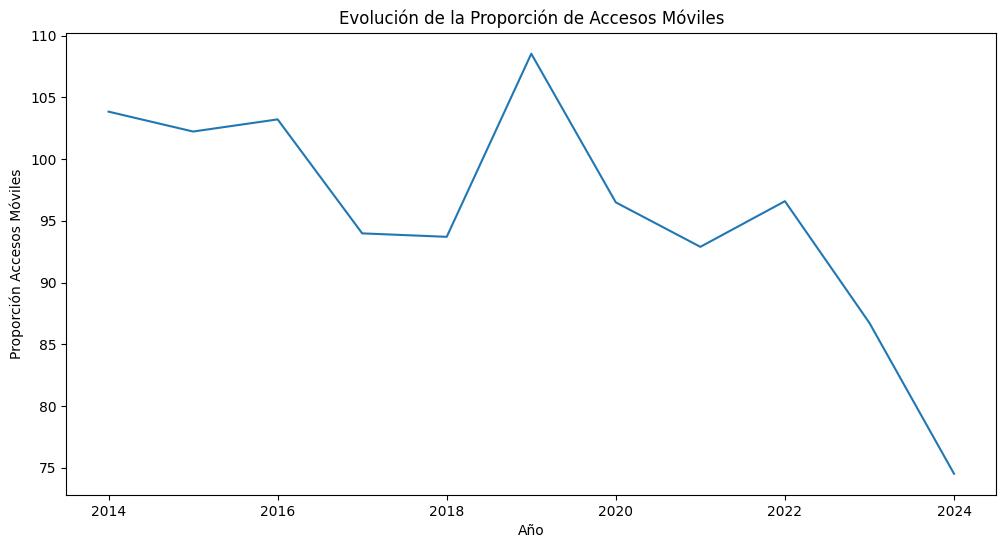

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_final, x="Año", y="Proporción_Accesos_Móviles", ci=None)
plt.title("Evolución de la Proporción de Accesos Móviles")
plt.xlabel("Año")
plt.ylabel("Proporción Accesos Móviles")
plt.show()


b) Comparación por provincia
Si tienes datos por provincia, puedes graficar cómo varía la proporción entre provincias:

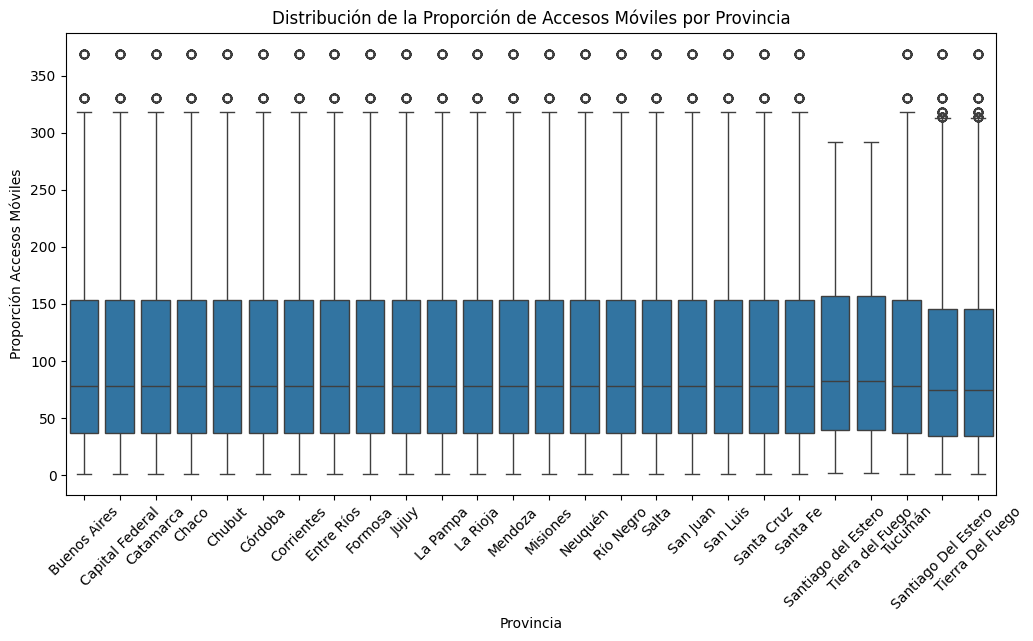

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_final, x="Provincia", y="Proporción_Accesos_Móviles")
plt.title("Distribución de la Proporción de Accesos Móviles por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Proporción Accesos Móviles")
plt.xticks(rotation=45)
plt.show()


Cómo integrar el dataset de conectividad
1. Objetivo
Utilizar la información geográfica y tecnológica del CSV para:

Visualizar la distribución de tecnologías (ADSL, fibra óptica, 4G, etc.) por región.
Identificar localidades con mayor o menor conectividad.
Incorporar mapas interactivos para representar las tecnologías.
2. Carga y limpieza del dataset
Primero, carga el archivo y realiza una limpieza básica:

In [27]:
import pandas as pd

# Cargar el archivo CSV
df_conectividad = pd.read_excel("D:\Soy Henry\Labs\Data Analystic\Dataset\mapa_conectividad.xlsx")

# Ver las primeras filas
print(df_conectividad.head())

# Limpieza básica
df_conectividad.fillna("No", inplace=True)  # Rellenar valores faltantes con "No"


      Provincia     Partido          Localidad  Población ADSL Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   SI         SI   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280   --         --   
2  BUENOS AIRES  25 de Mayo          Del Valle        899   SI         --   
3  BUENOS AIRES  25 de Mayo          Ernestina        145   SI         --   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547   --         --   

  Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  4G       Link  \
0      --           --        SI       SI             SI  SI  SI  6854100.0   
1      --           --        --       --             SI  --  --  6854010.0   
2      --           --        SI       --             --  SI  --  6854020.0   
3      --           --        --       --             SI  --  --  6854030.0   
4      --           --        --       SI             --  --  --  6854040.0   

     Latitud   Longitud  
0 -35.433939 -60.173121  
1 -35.7392

3. Creación de métricas clave
Puedes calcular métricas para enriquecer el análisis, como:

Cantidad de tecnologías disponibles por localidad:

In [28]:
tecnologias = ["ADSL", "Cablemódem", "Dial Up", "Fibra óptica", "Satelital", "Wireless", "Telefonía Fija", "3G", "4G"]

# Contar cuántas tecnologías tiene cada localidad
df_conectividad["Total Tecnologías"] = df_conectividad[tecnologias].apply(lambda row: row.eq("SI").sum(), axis=1)

# Ver los resultados
print(df_conectividad[["Localidad", "Total Tecnologías"]].head())


           Localidad  Total Tecnologías
0         25 de Mayo                  7
1    Agustín Mosconi                  1
2          Del Valle                  3
3          Ernestina                  2
4  Gobernador Ugarte                  1


Porcentaje de localidades con tecnología por provincia:

In [29]:
df_por_provincia = df_conectividad.groupby("Provincia")[tecnologias].apply(lambda x: (x == "SI").sum() / len(x) * 100)

# Ver el porcentaje por tecnología y provincia
print(df_por_provincia)


                           ADSL  Cablemódem     Dial Up  Fibra óptica  \
Provincia                                                               
BUENOS AIRES          38.888889   38.000000   23.666667     52.333333   
CABA                 100.000000  100.000000  100.000000    100.000000   
CATAMARCA              7.692308    1.648352    0.549451     15.934066   
CHACO                 30.434783   17.391304    1.086957     51.086957   
CHUBUT                15.555556   11.111111   16.666667     15.555556   
CORDOBA               31.654676   15.467626    0.899281     32.733813   
CORRIENTES            26.923077   12.820513    1.282051     29.487179   
ENTRE RIOS            23.958333   19.270833    2.083333     27.083333   
FORMOSA               20.634921    4.761905    0.000000     25.396825   
JUJUY                 11.875000    9.375000    0.000000     30.625000   
LA PAMPA              12.359551   19.101124   14.606742     58.426966   
LA RIOJA              10.869565   23.913043    1.08

4. Visualización en mapas
Puedes usar folium o plotly para crear un mapa interactivo.

Mapa básico con folium

In [30]:
import folium

# Crear un mapa base
mapa = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)  # Coordenadas generales de Argentina

# Definir las tecnologías y sus colores
tecnologias_colores = {
    "ADSL": "blue",
    "Cablemódem": "green",
    "Dial Up": "purple",
    "Fibra óptica": "red",
    "Satelital": "orange",
    "Wireless": "darkblue",
    "Telefonía Fija": "gray",
    "3G": "pink",
    "4G": "lightblue"
}

# Añadir marcadores por tecnología
for _, row in df_conectividad.iterrows():
    for tecnologia, color in tecnologias_colores.items():
        if row[tecnologia] == "SI":  # Verificar si la tecnología está disponible
            folium.CircleMarker(
                location=[row["Latitud"], row["Longitud"]],
                radius=5,  # Tamaño del marcador
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f"{tecnologia} disponible en {row['Localidad']} - {row['Provincia']}",
                tooltip=f"{tecnologia}: {row['Localidad']}"
            ).add_to(mapa)

# Guardar el mapa
mapa.save("mapa_conectividad.html")


Mapa avanzado con plotly

In [31]:
# Crear una columna categórica con las tecnologías disponibles
df_conectividad["Tecnologías Disponibles"] = df_conectividad.apply(
    lambda row: ", ".join([tech for tech in ["ADSL", "Cablemódem", "Dial Up", "Fibra óptica", "Satelital", "Wireless", "Telefonía Fija", "3G", "4G"] if row[tech] == "SI"]),
    axis=1
)


In [32]:
import plotly.express as px

# Crear el mapa interactivo
fig = px.scatter_geo(
    df_conectividad,
    lat="Latitud",
    lon="Longitud",
    color="Tecnologías Disponibles",  # Diferenciar por tecnologías
    hover_name="Localidad",
    hover_data=["Provincia", "Población", "Total Tecnologías"],
    title="Conectividad por Localidad y Tecnología"
)

# Ajustar la visualización geográfica
fig.update_geos(
    fitbounds="locations",
    showcountries=True,
    countrycolor="LightGrey"
)

# Mostrar el mapa
fig.show()


4. Insights posibles
¿Qué provincias tienen mayor proporción de accesos móviles?
¿Cómo ha evolucionado la proporción de accesos móviles con respecto al tiempo?
¿Qué factores podrían influir en las diferencias entre provincias o años?

In [1]:
print(merged_final.columns)


NameError: name 'merged_final' is not defined

 Documentación y Conclusiones
a) Insights clave
Utiliza celdas Markdown en tu notebook para documentar:

Tendencias observadas en la penetración por servicio y los ingresos.
Relaciones entre servicios (por ejemplo, penetración de TV vs Internet).
Oportunidades de mejora según las provincias con menor acceso.
b) Siguiente paso: Dashboard
Con los análisis listos, puedes crear un dashboard interactivo en Power BI, Tableau o Streamlit, integrando gráficos como:

Comparaciones de ingresos entre servicios.
Evolución de penetración por cada 100 habitantes.
KPI de crecimiento de ingresos.

Unificar Columnas de Provincia:

Puedes elegir una columna (por ejemplo, Provincia_y) y renombrarla como Provincia para mayor claridad.

In [40]:
data=merged_final
data["Provincia"] = data["Provincia_y"].fillna(data["Provincia_x"])
data.drop(columns=["Provincia_x", "Provincia_y"], inplace=True)
data["Provincia"] = data["Provincia"].str.strip().str.title()



KeyError: 'Provincia_y'

In [42]:
data=merged_final
data["Periodo"] = data["Periodo_y"].fillna(data["Periodo_x"])
data.drop(columns=["Periodo_x", "Periodo_y"], inplace=True)
data["Periodo"] = data["Periodo"].str.strip().str.title()

In [44]:

data=merged_final
data["Ingresos (miles de $)"] = data["Ingresos (miles de $)_x"].fillna(data["Ingresos (miles de $)_y"])
data.drop(columns=["Ingresos (miles de $)_x", "Ingresos (miles de $)_y"], inplace=True)
data["Ingresos (miles de $)"] = data["Ingresos (miles de $)"].str.strip().str.title()

AttributeError: Can only use .str accessor with string values!

Revisar y Rellenar Valores Nulos:

Para columnas numéricas, se puede rellenar con 0 o con la media, según el caso.
Para columnas categóricas, se puede rellenar con "Sin especificar".

In [35]:
# Rellenar valores nulos en columnas numéricas
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
data[num_cols] = data[num_cols].fillna(0)

# Rellenar valores nulos en columnas categóricas
cat_cols = data.select_dtypes(include=["object"]).columns
data[cat_cols] = data[cat_cols].fillna("Sin especificar")


Corregir Inconsistencias en los Nombres de las Provincias:

Manejar casos duplicados como Santiago Del Estero y Santiago del Estero

In [37]:
data["Provincia"] = data["Provincia"].replace({
    "Santiago Del Estero": "Santiago del Estero",
    "Tierra Del Fuego": "Tierra del Fuego"
})
data.drop_duplicates(inplace=True)


Validar Columnas Específicas para los Gráficos:

Asegúrate de que las columnas usadas para gráficos como Ingresos TV por suscripción (miles de $) o Accesos TV por suscripción (Vrf) tengan datos consistentes.

In [38]:
# Verificar columnas clave
print(data[["Año", "Provincia", "Ingresos (miles de pesos)", "Accesos TV por suscripción (Vrf)"]].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562756 entries, 0 to 562755
Data columns (total 4 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Año                               562756 non-null  int64  
 1   Provincia                         562756 non-null  object 
 2   Ingresos (miles de pesos)         562756 non-null  float64
 3   Accesos TV por suscripción (Vrf)  562756 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.2+ MB
None


In [46]:
# Guardar el DataFrame en un archivo Excel
data.to_excel("merged_final.xlsx", index=False)


Exception ignored in: <function ZipFile.__del__ at 0x0000025F2E178220>
Traceback (most recent call last):
  File "c:\Users\calde\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1917, in __del__
    self.close()
  File "c:\Users\calde\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1934, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [47]:
data["Provincia"] = data["Provincia"].fillna("Sin especificar")


In [49]:
# Filtro básico para debug
print(data[data["Provincia"] == "Buenos Aires"])
print(data[data["Año"] == 2023])



         Año  Trimestre  Accesos por cada 100 hogares  \
4       2014          1                     54.570073   
5       2014          1                     54.570073   
6       2014          1                     54.570073   
7       2014          1                     54.570073   
8       2014          1                     54.570073   
...      ...        ...                           ...   
562199  2024          2                     60.840000   
562200  2024          2                     60.840000   
562201  2024          2                     60.840000   
562202  2024          2                     60.840000   
562203  2024          2                     60.840000   

        Ingresos (miles de pesos)       Periodo  Accesos por cada 100 hab  \
4                    2.984054e+06  Ene-Mar 2013                148.070000   
5                    2.984054e+06  Ene-Mar 2013                148.070000   
6                    2.984054e+06  Ene-Mar 2013                148.070000   
7      

In [50]:
print(data["Provincia"].unique())
print(data["Año"].unique())


['Sin especificar' 'Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco'
 'Chubut' 'Córdoba' 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero'
 'Tierra del Fuego' 'Tucumán']
[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
